# Consumer complaints multi classification


* The dataset is from kaggle, you can check here : https://www.kaggle.com/shashwatwork/consume-complaints-dataset-fo-nlp
* We will use consumer narrative as an input and the output is 5 different product type.

> We will run 5 different modeling experiment with different models and save the best model based on evaluation metrics.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dataset = pd.read_csv("../input/consume-complaints-dataset-fo-nlp/complaints_processed.csv")
dataset

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [3]:
dataset[dataset['narrative'] == "name"]

,Unnamed: 0,product,narrative
162415,162415,debt_collection,name
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name
162420,162420,credit_reporting,name


In [4]:
dataset['product'].value_counts()

credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64

In [5]:
dataset.isna().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [6]:
del dataset['Unnamed: 0']

In [7]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name


In [8]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.isna().sum()

product      0
narrative    0
dtype: int64

In [9]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name


In [10]:
dataset[dataset['narrative'] == "name"]

,product,narrative
162405,debt_collection,name
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name
162410,credit_reporting,name


In [11]:
dataset = dataset[dataset['narrative'] != "name"]
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162400,credit_reporting,zales comenity bank closed sold account report...
162401,retail_banking,zelle suspended account without cause banking ...
162402,debt_collection,zero contact made debt supposedly resolved fou...
162403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [12]:
dataset['product'].value_counts()

credit_reporting       91171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

In [13]:
dataset['product'].value_counts()*100/len(dataset)

credit_reporting       56.138050
debt_collection        14.251409
mortgages_and_loans    11.692990
credit_card             9.583449
retail_banking          8.334103
Name: product, dtype: float64

In [14]:
# dataset[dataset['product'] == "credit_reporting"].index

In [15]:
# # reduce credit reporting data to make dataset quite balance
# np.random.seed(42)
# remove_n = 66000
# drop_indices = np.random.choice(dataset[dataset['product'] == "credit_reporting"].index, remove_n, replace=False)
# dataset_balance = dataset.drop(drop_indices)
# dataset_balance.reset_index(drop=True, inplace=True)
# dataset_balance

In [16]:
# dataset_balance['product'].value_counts()

In [17]:
# dataset_balance['product'].value_counts() * 100/len(dataset_balance)

In [18]:
# # use only 20% of balanced dataset
# dataset_shuffled = dataset_balance.sample(frac=0.2, random_state=42)
# dataset_shuffled

In [19]:
len(dataset)

162405

In [20]:
import random

In [21]:
# show random samples
random_index = random.randint(0, len(dataset)-5)
for row in dataset[["product", "narrative"]][random_index:random_index+5].itertuples():
    _, product, narrative = row
    print(f"Narrative: {narrative}")
    print(f"Type: \n{product}\n")
    print("-----------------------")

Narrative: pnc let connect app issue past pnc saying valid mobile number current number enrolled pnc banking since
Type: 
retail_banking

-----------------------
Narrative: pnc let connect app
Type: 
mortgages_and_loans

-----------------------
Narrative: pnc let link account external source solid reason see happened
Type: 
retail_banking

-----------------------
Narrative: pnc let link account seemingly reason error occurs every time log link account poor pnc happy
Type: 
retail_banking

-----------------------
Narrative: pnc let link link app
Type: 
retail_banking

-----------------------


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162405 entries, 0 to 162404
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162405 non-null  object
 1   narrative  162405 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


# Split data into training and validation set

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
X = list(dataset['narrative'])
y = list(dataset['product'])

In [25]:
train_text, val_text, train_label, val_label = train_test_split(X, y, test_size=0.2, random_state=42)
len(train_text), len(val_text), len(train_label), len(val_label)

(129924, 32481, 129924, 32481)

In [26]:
train_label[:10]

['credit_reporting',
 'debt_collection',
 'credit_card',
 'credit_reporting',
 'debt_collection',
 'credit_reporting',
 'mortgages_and_loans',
 'credit_reporting',
 'credit_reporting',
 'credit_card']

In [27]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_onehot = one_hot_encoder.fit_transform(np.reshape(train_label, (-1,1)))
val_labels_onehot = one_hot_encoder.transform(np.reshape(val_label, (-1,1)))
train_labels_onehot, val_labels_onehot

(array([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]]))

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_label)
val_labels_encoded = label_encoder.transform(val_label)
train_labels_encoded, val_labels_encoded

(array([1, 2, 0, ..., 1, 1, 4]), array([1, 3, 1, ..., 0, 3, 3]))

# Converting text into numbers

In [29]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [30]:
text_vectorizer = TextVectorization(max_tokens=None, standardize="lower_and_strip_punctuation", split="whitespace", 
                                   ngrams=None, output_mode="int", output_sequence_length=None, pad_to_max_tokens=True)

In [31]:
sent_len = [len(i.split()) for i in train_text]
avg_sent = round(sum([len(i.split()) for i in train_text])/len(train_text))
avg_sent

80

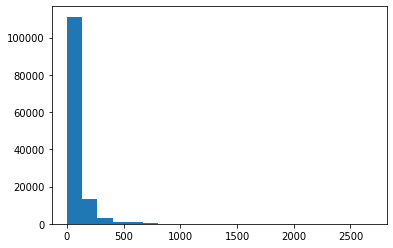

In [32]:
import matplotlib.pyplot as plt
plt.hist(sent_len, bins=20);

In [33]:
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

240

In [34]:
# Setup text vectorization variables
max_vocab_length = 20000
max_length = output_seq_len

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=output_seq_len)

In [35]:
# fit text vectorizer to the training set
text_vectorizer.adapt(train_text)

In [38]:
# get the unique words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number vocab in words: {len(words_in_vocab)}")
print(f"Top 5 common words: {top_5_words}")
print(f"Least 5 common words: {bottom_5_words}")

Number vocab in words: 20000
Top 5 common words: ['', '[UNK]', 'credit', 'account', 'report']
Least 5 common words: ['vac', 'uxxxx', 'uva', 'uttility', 'utlizing']


# Creating an embedding layer

In [39]:
from tensorflow.keras import layers

In [40]:
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=128, input_length=output_seq_len)
embedding

# Modeling text dataset : Baseline model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [44]:
# create tokenization and modelling pipeline
model_0 = Pipeline([
            ("tfidf", TfidfVectorizer()),
            ("clf", MultinomialNB())
])

# fit pipeline to the training data
model_0.fit(train_text, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [45]:
# Evaluate baseline model
baseline_score = model_0.score(val_text, val_labels_encoded)
print(f"Accuracy score: {baseline_score*100:.2f}%")

Accuracy score: 80.77%


In [46]:
# make predictions 
baseline_preds = model_0.predict(val_text)
baseline_preds[:20]

array([1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 1, 4, 0, 1, 1, 1, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [48]:
def calculate_result(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)*100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy, 
                    "precision": model_precision, 
                    "recall": model_recall, 
                    "f1-score": model_f1}
    return model_results

In [49]:
# get baseline results
baseline_results = calculate_result(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 80.77337520396539,
 'precision': 0.8145016674513975,
 'recall': 0.8077337520396539,
 'f1-score': 0.7935310171770534}

# Model 1 : Dense model

In [50]:
# import datetime
# from tensorflow.keras.callbacks import TensorBoard

# # create tensorboard callback
# def create_tensorboard_callback(dir_name, experiment_name):
#   log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#   tensorboard_callback = TensorBoard(log_dir=log_dir)
#   print(f"Saving tensorboard log files to: {log_dir}.")
#   return tensorboard_callback

In [51]:
from tensorflow.keras import layers

In [52]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Dense(128,activation="relu")(x) # add extra dense layer
x = layers.Dense(64,activation="relu")(x) # add extra dense layer
x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 240)               0         
_________________________________________________________________
embedding (Embedding)        (None, 240, 128)          2560000   
_________________________________________________________________
dense (Dense)                (None, 240, 64)           8256      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 2,568,581
Trainable params: 2,568,581
Non-trainable params: 0
___________________________________________

In [53]:
model_1.compile(loss="categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_text, train_labels_onehot))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_text, val_labels_onehot))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [55]:
train_dataset, val_dataset

(<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>)

In [56]:
history_model_1 = model_1.fit(train_dataset, epochs=5, steps_per_epoch=int(0.1*len(train_dataset)),  
                              validation_data=val_dataset, validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
406/406 [==============================] - 16s 36ms/step - loss: 1.2231 - accuracy: 0.5803 - val_loss: 0.7808 - val_accuracy: 0.7209
Epoch 2/5
406/406 [==============================] - 14s 33ms/step - loss: 0.7058 - accuracy: 0.7562 - val_loss: 0.5920 - val_accuracy: 0.8079
Epoch 3/5
406/406 [==============================] - 14s 34ms/step - loss: 0.5906 - accuracy: 0.8016 - val_loss: 0.5304 - val_accuracy: 0.8239
Epoch 4/5
406/406 [==============================] - 14s 35ms/step - loss: 0.5327 - accuracy: 0.8268 - val_loss: 0.5085 - val_accuracy: 0.8308
Epoch 5/5
406/406 [==============================] - 13s 33ms/step - loss: 0.5323 - accuracy: 0.8274 - val_loss: 0.4901 - val_accuracy: 0.8419


In [57]:
model_1.evaluate(val_dataset)

1016/1016 [==============================] - 7s 6ms/step - loss: 0.5033 - accuracy: 0.8353


[0.5033175349235535, 0.8352575302124023]

In [58]:
model_1_probs = model_1.predict(val_dataset)

In [59]:
model_1_probs

array([[3.14967428e-06, 9.99088168e-01, 9.07915004e-04, 8.07790059e-07,
        1.35263092e-10],
       [3.20836119e-02, 6.74207926e-01, 1.02081515e-01, 1.81483284e-01,
        1.01436321e-02],
       [1.23205621e-06, 9.99998689e-01, 6.87516355e-09, 1.35769170e-07,
        3.12297321e-14],
       ...,
       [1.34474501e-01, 5.23889124e-01, 1.43802583e-01, 1.43299237e-01,
        5.45345284e-02],
       [3.02026165e-04, 3.07234246e-02, 1.60756963e-03, 9.67339993e-01,
        2.70046658e-05],
       [1.18475854e-01, 7.41612762e-02, 2.61344880e-01, 4.31283623e-01,
        1.14734322e-01]], dtype=float32)

In [60]:
model_1_preds = model_1_probs.argmax(axis=1)
model_1_preds.shape

(32481,)

In [61]:
model_1_results = calculate_result(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 83.52575351744098,
 'precision': 0.8336416150212755,
 'recall': 0.8352575351744097,
 'f1-score': 0.8286483955913696}

# Model 2 : 1-D CNN

In [62]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=128, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_conv1d")

model_2.compile(loss="categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_2.summary()

Model: "model_2_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 240)               0         
_________________________________________________________________
embedding (Embedding)        (None, 240, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 236, 128)          82048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 232, 64)           41024     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)              

In [63]:
history_model_2 = model_2.fit(train_dataset, epochs=5, steps_per_epoch=int(0.1*len(train_dataset)),  
                              validation_data=val_dataset, validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
406/406 [==============================] - 21s 35ms/step - loss: 0.5640 - accuracy: 0.7927 - val_loss: 0.4625 - val_accuracy: 0.8376
Epoch 2/5
406/406 [==============================] - 14s 35ms/step - loss: 0.4040 - accuracy: 0.8558 - val_loss: 0.4354 - val_accuracy: 0.8481
Epoch 3/5
406/406 [==============================] - 14s 34ms/step - loss: 0.4048 - accuracy: 0.8617 - val_loss: 0.4159 - val_accuracy: 0.8506
Epoch 4/5
406/406 [==============================] - 14s 34ms/step - loss: 0.3784 - accuracy: 0.8622 - val_loss: 0.4300 - val_accuracy: 0.8493
Epoch 5/5
406/406 [==============================] - 14s 35ms/step - loss: 0.3924 - accuracy: 0.8617 - val_loss: 0.4176 - val_accuracy: 0.8549


In [64]:
model_2.evaluate(val_dataset)

1016/1016 [==============================] - 7s 7ms/step - loss: 0.4008 - accuracy: 0.8578


[0.4008012115955353, 0.8577938079833984]

In [65]:
model_2_probs = model_2.predict(val_dataset)
model_2_preds = model_2_probs.argmax(axis=1)
model_2_preds.shape

(32481,)

In [66]:
model_2_results = calculate_result(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 85.77937871370955,
 'precision': 0.8600808014366836,
 'recall': 0.8577937871370955,
 'f1-score': 0.8585902599122228}

# Model 3 : USE model

In [67]:
# use tensorflow hub models for transfer learning
import tensorflow_hub as hub

In [68]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", name="USE")

In [69]:
model_3 = tf.keras.Sequential([
    sentence_encoder_layer, 
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_3_USE")

model_3.compile(loss="categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_3.summary()

Model: "model_3_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 33,157
Non-trainable params: 256,797,824
_________________________________________________________________


In [70]:
history_model_3 = model_3.fit(train_dataset, epochs=5, steps_per_epoch=int(0.1*len(train_dataset)),  
                              validation_data=val_dataset, validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
406/406 [==============================] - 18s 38ms/step - loss: 0.9706 - accuracy: 0.6528 - val_loss: 0.5576 - val_accuracy: 0.8150
Epoch 2/5
406/406 [==============================] - 16s 38ms/step - loss: 0.5325 - accuracy: 0.8155 - val_loss: 0.5297 - val_accuracy: 0.8137
Epoch 3/5
406/406 [==============================] - 15s 38ms/step - loss: 0.5153 - accuracy: 0.8130 - val_loss: 0.5176 - val_accuracy: 0.8165
Epoch 4/5
406/406 [==============================] - 15s 36ms/step - loss: 0.4955 - accuracy: 0.8201 - val_loss: 0.5072 - val_accuracy: 0.8184
Epoch 5/5
406/406 [==============================] - 16s 39ms/step - loss: 0.4993 - accuracy: 0.8191 - val_loss: 0.4966 - val_accuracy: 0.8246


In [71]:
model_3.evaluate(val_dataset)

1016/1016 [==============================] - 31s 30ms/step - loss: 0.4895 - accuracy: 0.8232


[0.489451140165329, 0.8232197165489197]

In [72]:
model_3_probs = model_3.predict(val_dataset)
model_3_preds = model_3_probs.argmax(axis=1)
model_3_preds.shape

(32481,)

In [73]:
model_3_results = calculate_result(val_labels_encoded, model_3_preds)
model_3_results

{'accuracy': 82.32197284566361,
 'precision': 0.8189713935026355,
 'recall': 0.8232197284566362,
 'f1-score': 0.8194496564075168}

# Model 4 : USE fine tune

In [74]:
sentence_encoder_layer_tuned = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", trainable=True, name="USE")

In [75]:
model_4 = tf.keras.Sequential([
    sentence_encoder_layer_tuned, 
#     layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_4_USE_tuned")

model_4.compile(loss="categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_4.summary()

Model: "model_4_USE_tuned"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 256,830,981
Non-trainable params: 0
_________________________________________________________________


In [76]:
history_model_4 = model_4.fit(train_dataset, epochs=5, steps_per_epoch=int(0.1*len(train_dataset)),  
                              validation_data=val_dataset, validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
406/406 [==============================] - 49s 105ms/step - loss: 0.8456 - accuracy: 0.7061 - val_loss: 0.4454 - val_accuracy: 0.8431
Epoch 2/5
406/406 [==============================] - 42s 104ms/step - loss: 0.4218 - accuracy: 0.8548 - val_loss: 0.4291 - val_accuracy: 0.8533
Epoch 3/5
406/406 [==============================] - 43s 105ms/step - loss: 0.3882 - accuracy: 0.8694 - val_loss: 0.3990 - val_accuracy: 0.8614
Epoch 4/5
406/406 [==============================] - 42s 104ms/step - loss: 0.3575 - accuracy: 0.8695 - val_loss: 0.3845 - val_accuracy: 0.8682
Epoch 5/5
406/406 [==============================] - 42s 103ms/step - loss: 0.3632 - accuracy: 0.8748 - val_loss: 0.3564 - val_accuracy: 0.8765


In [77]:
model_4.evaluate(val_dataset)

1016/1016 [==============================] - 30s 29ms/step - loss: 0.3474 - accuracy: 0.8776


[0.34741371870040894, 0.8775591850280762]

In [78]:
model_4_probs = model_4.predict(val_dataset)
model_4_preds = model_4_probs.argmax(axis=1)
model_4_preds.shape

(32481,)

In [79]:
model_4_results = calculate_result(val_labels_encoded, model_4_preds)
model_4_results

{'accuracy': 87.75591884486315,
 'precision': 0.8762975934943374,
 'recall': 0.8775591884486315,
 'f1-score': 0.8756943487292321}

# Model 5 : BERT

In [80]:
!pip install transformers

In [81]:
from transformers import DistilBertTokenizerFast

In [82]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [83]:
train_encodings = tokenizer(train_text, padding=True, truncation=True, max_length=240)
val_encodings = tokenizer(val_text, padding=True, truncation=True, max_length=240)

In [84]:
train_data_bert = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_onehot))
train_data_bert = train_data_bert.batch(32).prefetch(tf.data.AUTOTUNE)

val_data_bert = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_onehot))
val_data_bert = val_data_bert.batch(32).prefetch(tf.data.AUTOTUNE)

train_data_bert, val_data_bert

(<PrefetchDataset shapes: ({input_ids: (None, 240), attention_mask: (None, 240)}, (None, 5)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>,
 <PrefetchDataset shapes: ({input_ids: (None, 240), attention_mask: (None, 240)}, (None, 5)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>)

In [85]:
classes = len(label_encoder.classes_)
classes

5

In [86]:
from transformers import TFDistilBertForSequenceClassification
model_bert = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=classes)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [87]:
model_bert.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  3845      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,957,317
Trainable params: 66,957,317
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_bert.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                  optimizer=tf.keras.optimizers.Adam(lr=5e-5), 
                  metrics=tf.keras.metrics.CategoricalAccuracy())

In [89]:
history_model_bert = model_bert.fit(train_data_bert, epochs=5, steps_per_epoch=int(0.1*len(train_data_bert)),  
                                    validation_data=val_data_bert, validation_steps=int(0.1*len(val_data_bert)))

Epoch 1/5
406/406 [==============================] - 214s 490ms/step - loss: 0.8605 - categorical_accuracy: 0.6922 - val_loss: 0.4693 - val_categorical_accuracy: 0.8434
Epoch 2/5
406/406 [==============================] - 197s 484ms/step - loss: 0.4290 - categorical_accuracy: 0.8503 - val_loss: 0.4230 - val_categorical_accuracy: 0.8608
Epoch 3/5
406/406 [==============================] - 196s 483ms/step - loss: 0.4047 - categorical_accuracy: 0.8608 - val_loss: 0.3919 - val_categorical_accuracy: 0.8685
Epoch 4/5
406/406 [==============================] - 197s 485ms/step - loss: 0.3830 - categorical_accuracy: 0.8624 - val_loss: 0.3997 - val_categorical_accuracy: 0.8648
Epoch 5/5
406/406 [==============================] - 197s 485ms/step - loss: 0.3825 - categorical_accuracy: 0.8632 - val_loss: 0.3689 - val_categorical_accuracy: 0.8648


In [90]:
model_bert_probs = model_bert.predict(val_data_bert)
model_bert_probs

TFSequenceClassifierOutput(loss=None, logits=array([[-2.204496  ,  4.87678   ,  0.88861144, -2.2034497 , -4.1306744 ],
       [-3.3327284 ,  1.8782706 , -0.7202005 ,  2.4542122 , -3.2084057 ],
       [-1.5509996 ,  4.4190454 , -0.7693258 , -0.36379808, -4.244677  ],
       ...,
       [ 1.9439989 , -0.5206029 , -0.3121944 , -0.01137224, -1.6069021 ],
       [-3.4180436 ,  1.8357799 , -0.67019844,  2.7130988 , -3.505824  ],
       [-2.514082  , -1.2435526 ,  0.7788782 ,  1.7106112 , -0.9487323 ]],
      dtype=float32), hidden_states=None, attentions=None)

In [91]:
tf.nn.softmax(model_bert_probs.logits)

<tf.Tensor: shape=(32481, 5), dtype=float32, numpy=
array([[8.2394213e-04, 9.8006701e-01, 1.8164193e-02, 8.2480459e-04,
        1.2005168e-04],
       [1.9045550e-03, 3.4906128e-01, 2.5965696e-02, 6.2091178e-01,
        2.1566828e-03],
       [2.5122222e-03, 9.8359352e-01, 5.4895240e-03, 8.2348008e-03,
        1.6990594e-04],
       ...,
       [7.3529309e-01, 6.2531307e-02, 7.7020824e-02, 1.0405275e-01,
        2.1102009e-02],
       [1.4952540e-03, 2.8603661e-01, 2.3339367e-02, 6.8775910e-01,
        1.3695962e-03],
       [9.5581207e-03, 3.4053084e-02, 2.5732797e-01, 6.5333134e-01,
        4.5729380e-02]], dtype=float32)>

In [92]:
model_bert_preds = tf.argmax(tf.nn.softmax(model_bert_probs.logits), axis=1)
model_bert_preds

<tf.Tensor: shape=(32481,), dtype=int64, numpy=array([1, 3, 1, ..., 0, 3, 3])>

In [93]:
bert_results = calculate_result(val_labels_encoded, model_bert_preds)
bert_results

{'accuracy': 87.303346571842,
 'precision': 0.8734527237314349,
 'recall': 0.87303346571842,
 'f1-score': 0.8727770234180448}

# Comparing models

In [94]:
all_model_results = pd.DataFrame({
    "baseline model NaiveBayes": baseline_results, 
    "Dense model": model_1_results, 
    "1D Conv model": model_2_results, 
    "USE model": model_3_results, 
    "USE fine tuned model": model_4_results, 
    "bert model": bert_results
}).transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline model NaiveBayes,80.773375,0.814502,0.807734,0.793531
Dense model,83.525754,0.833642,0.835258,0.828648
1D Conv model,85.779379,0.860081,0.857794,0.858590
USE model,82.321973,0.818971,0.823220,0.819450
USE fine tuned model,87.755919,0.876298,0.877559,0.875694
bert model,87.303347,0.873453,0.873033,0.872777


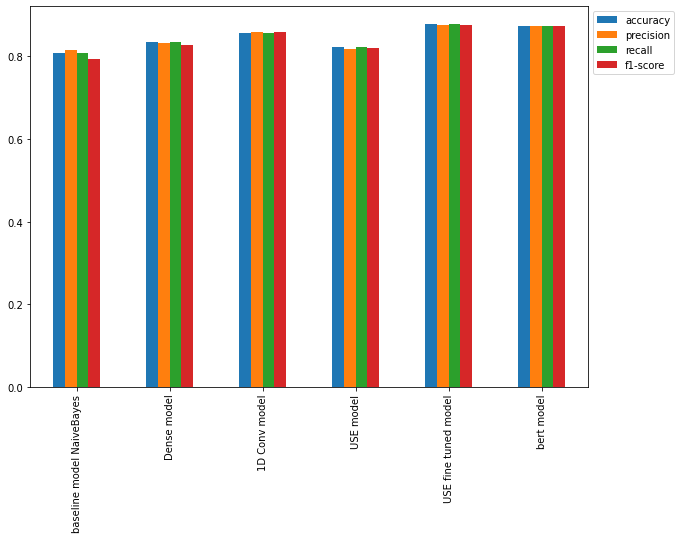

In [95]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

**Notes:**

It seems fine tuned transfer learning with USE model is the best performing model based on f1-score value. But dense model can still be improved and another model can be trained for longer epochs. 

In [97]:
import time

In [98]:
def pred_timer(model, samples): 
    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_per_pred = total_time/len(samples)
    return total_time, time_per_pred

In [99]:
# check for how long model make predictions 
model_4_total_time, model_4_per_pred = pred_timer(model_4, val_dataset)
model_4_total_time, model_4_per_pred

(27.384038709999913, 0.026952794005905428)

In [100]:
model_bert_total_time, model_bert_per_pred = pred_timer(model_bert, val_data_bert)
model_bert_total_time, model_bert_per_pred

(151.69260472600035, 0.14930374480905548)

In [101]:
model_1_total_time, model_1_per_pred = pred_timer(model_1, val_dataset)
model_1_total_time, model_1_per_pred

(4.7638016920000155, 0.004688781192913401)

In [102]:
import matplotlib.pyplot as plt

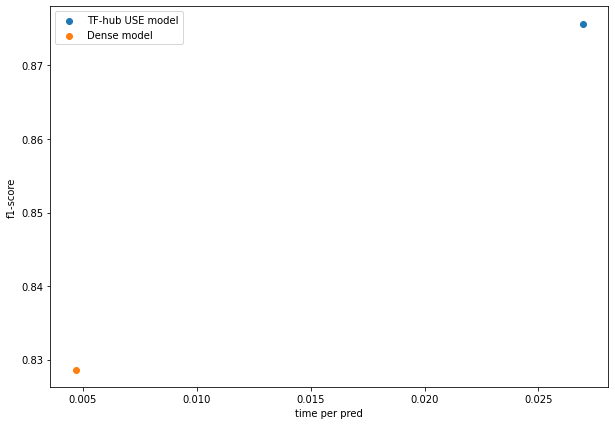

In [103]:
plt.figure(figsize=(10, 7))
plt.scatter(model_4_per_pred, model_4_results['f1-score'], label="TF-hub USE model")
plt.scatter(model_1_per_pred, model_1_results['f1-score'], label="Dense model")
plt.legend()
plt.ylabel("f1-score")
plt.xlabel("time per pred");

In [112]:
class_names =  label_encoder.classes_

In [113]:
val_df = pd.DataFrame({
    "text": val_text, 
    "true label": class_names[val_labels_encoded], 
    "pred label": class_names[model_4_preds], 
    "probability": model_4_probs.max(axis=1)
})
val_df

,text,true label,pred label,probability
0,called filed dispute numerous occasion equifax...,credit_reporting,credit_reporting,0.984699
1,looking report noticed vehicle returned dealer...,mortgages_and_loans,mortgages_and_loans,0.890131
2,listed account ftc violation last reported ori...,credit_reporting,credit_reporting,0.988350
3,trying access bank account online account bloc...,retail_banking,retail_banking,0.832252
4,cant verify account refuse give information di...,credit_reporting,credit_reporting,0.834106
...,...,...,...,...
32476,applied mortgage refinance understand process ...,mortgages_and_loans,mortgages_and_loans,0.970159
32477,house taken squatter year could manage take sq...,mortgages_and_loans,mortgages_and_loans,0.720001
32478,capital one keep changing statement date month...,credit_card,credit_card,0.452413
32479,quicken loan offered covid forbearance u repai...,mortgages_and_loans,mortgages_and_loans,0.930200


In [114]:
most_wrong_pred = val_df[val_df['true label'] != val_df['pred label']].sort_values("probability", ascending=False)
most_wrong_pred

,text,true label,pred label,probability
19303,filed dispute regard incorrect item credit rep...,debt_collection,credit_reporting,0.995410
23054,reporting anything statement consumer credit f...,credit_card,credit_reporting,0.994313
29301,copy credit account belong also inquiry belong...,debt_collection,credit_reporting,0.993957
12595,recently pulled credit report noticed inquiry ...,debt_collection,credit_reporting,0.993933
27317,according fair credit reporting act credit rep...,debt_collection,credit_reporting,0.993862
...,...,...,...,...
768,negligence car repair service cancelled check ...,debt_collection,mortgages_and_loans,0.274382
29770,paid credit card amount iprior came back compa...,credit_card,retail_banking,0.269794
9500,colleague liar already caught contradicting st...,credit_card,mortgages_and_loans,0.261195
31111,receipt prosperity bank response see attached ...,retail_banking,debt_collection,0.248449


In [115]:
# see 5 random samples of most wrong prediction
for i, row in most_wrong_pred[:200].sample(n=5).iterrows():
    print(f"Text: {row[0]}")
    print(f"True label: {row[1]}")
    print(f"Pred label: {row[2]}")
    print(f"Probability: {row[3]}")
    print("###########################################\n")

Text: yr fixed va loan serviced cmg mortgage requested forbearance care act related financial hardship due approval forbearance approval current mortgage payment received notice approval forbearance halted payment noticed point drop credit rating based data submitted cmg mortgage understanding care act forbearance period negatively affected score case reached cmg mortgage attempt resolve recieved resolution assitantance matter would greatly appreciated sincerely
True label: credit_reporting
Pred label: mortgages_and_loans
Probability: 0.9548461437225342
###########################################

Text: contacted bureau creditor account provided detail reported inaccurately nothing changed since
True label: mortgages_and_loans
Pred label: credit_reporting
Probability: 0.9743559956550598
###########################################

Text: disputed inaccurate account reported company file maintain social security informed day ago item deleted credit report discovered item reinserted credi